## Book Recommendation System


<b>Note - </b> It is not always standard practice to add so many comments in a jupyter notebook as I have done, but I have purposely done so to help with better understanding of  the code step by step.

Project and data overview is available in the README

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#importing necessary libraries
#pandas for analyzing, cleaning, exploring, and manipulating data - coded as 'pd'
#numpy for perform mathematical operations on our dataset which is an array - coded as 'np'

#### Data Exploration
To find out the type of information we have in our data e.g author, ratings, language etc
We will take a nook at what the data looks like and remove any error inducing, null or unnecesary feilds

In [2]:
df = pd.read_csv('books.csv', on_bad_lines = 'warn') #identifying our dataset and dropping any lines that have outstanding feilds which caused an exception/error to be raised 
df.head() #sample/first 5 rows of our movies datatset

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
df.isnull().sum() #to check if there are any missing values in our data

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [4]:
df.describe() 

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


From the describe results above, we see we have over 11,000 books which have ratings between 0 and 5.

In [5]:
rated_books = df[df['ratings_count'] > 2500] #showing only books with over 2,500 ratings
rated_books

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11065,45432,The Supernaturalist,Eoin Colfer,3.86,078685149X,9780786851492,en-US,267,24863,1001,4/20/2005,Disney-Hyperion
11066,45436,The Wish List,Eoin Colfer,3.77,0439443369,9780439443364,eng,252,13988,589,7/1/2004,Scholastic Inc.
11081,45486,His Dark Materials (His Dark Materials #1-3),Philip Pullman,4.26,0375847227,9780375847226,eng,933,2656,260,4/10/2007,Alfred A. Knopf
11096,45536,On the Road,Jack Kerouac/Ann Charters,3.63,0142437255,9780142437254,en-US,307,3271,342,1/3/2006,Penguin Classics


<AxesSubplot:xlabel='average_rating', ylabel='title'>

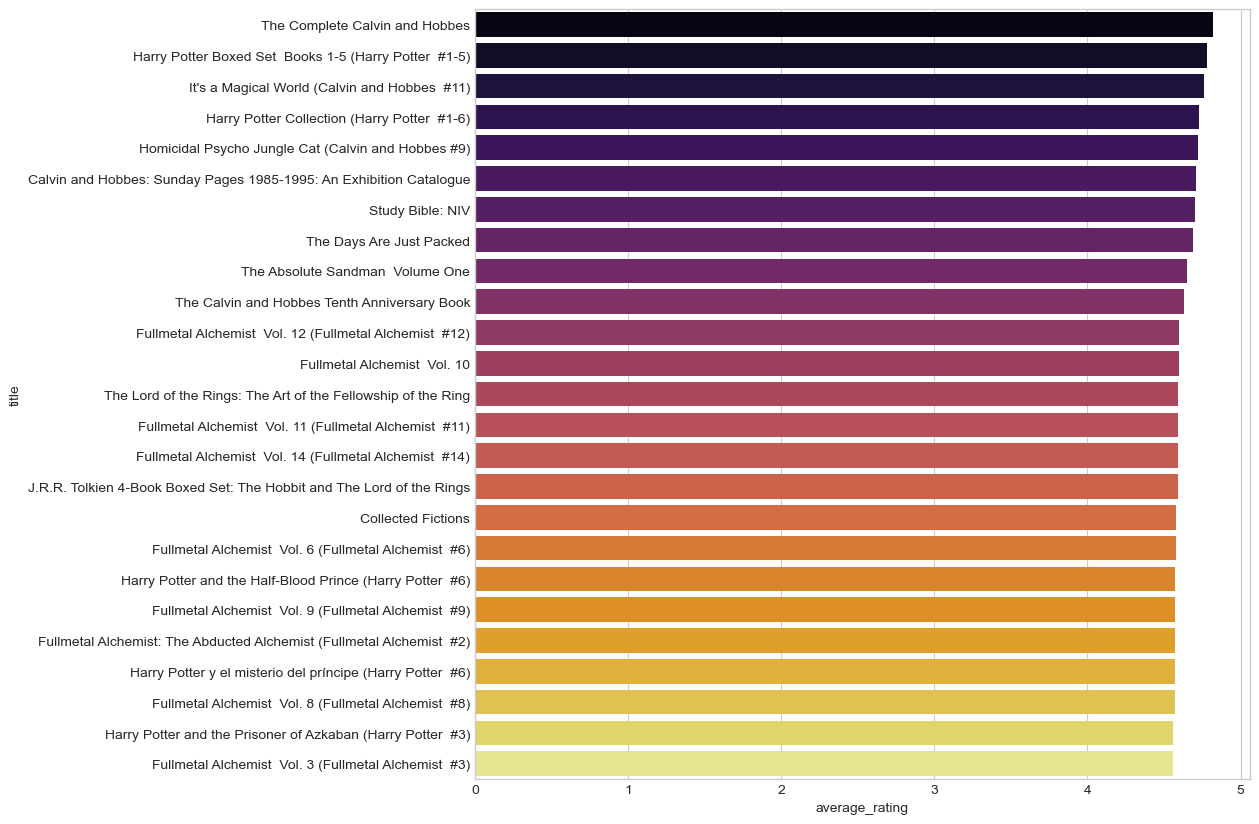

In [6]:
rated_books = df[df['ratings_count'] > 2500] #only selecting the books with over 2,500 ratings
rated_books.sort_values(by='average_rating', ascending=False) #sorting the books by average rating
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))
data = rated_books.sort_values(by='average_rating', ascending=False).head(25) #showing the top 25 rated books
sns.barplot(x="average_rating", y="title", data=data, palette='inferno')

The results above show us the top 25 books in our data. We see a maximum rating capacity of 5.0 but no books have achieved this score. We’ve made sure that all of the books we have in the above results have a over 2,500 ratings. There may be books which have only 1 or 2 ratings at 5.0 which we do not want, hence we use this type of filtering to avoid such books.

Now we'll take a look at some of the top authors in our database and rank them according to the number of books they’ve written listed in the data

/Users/izegbuaihongbe/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


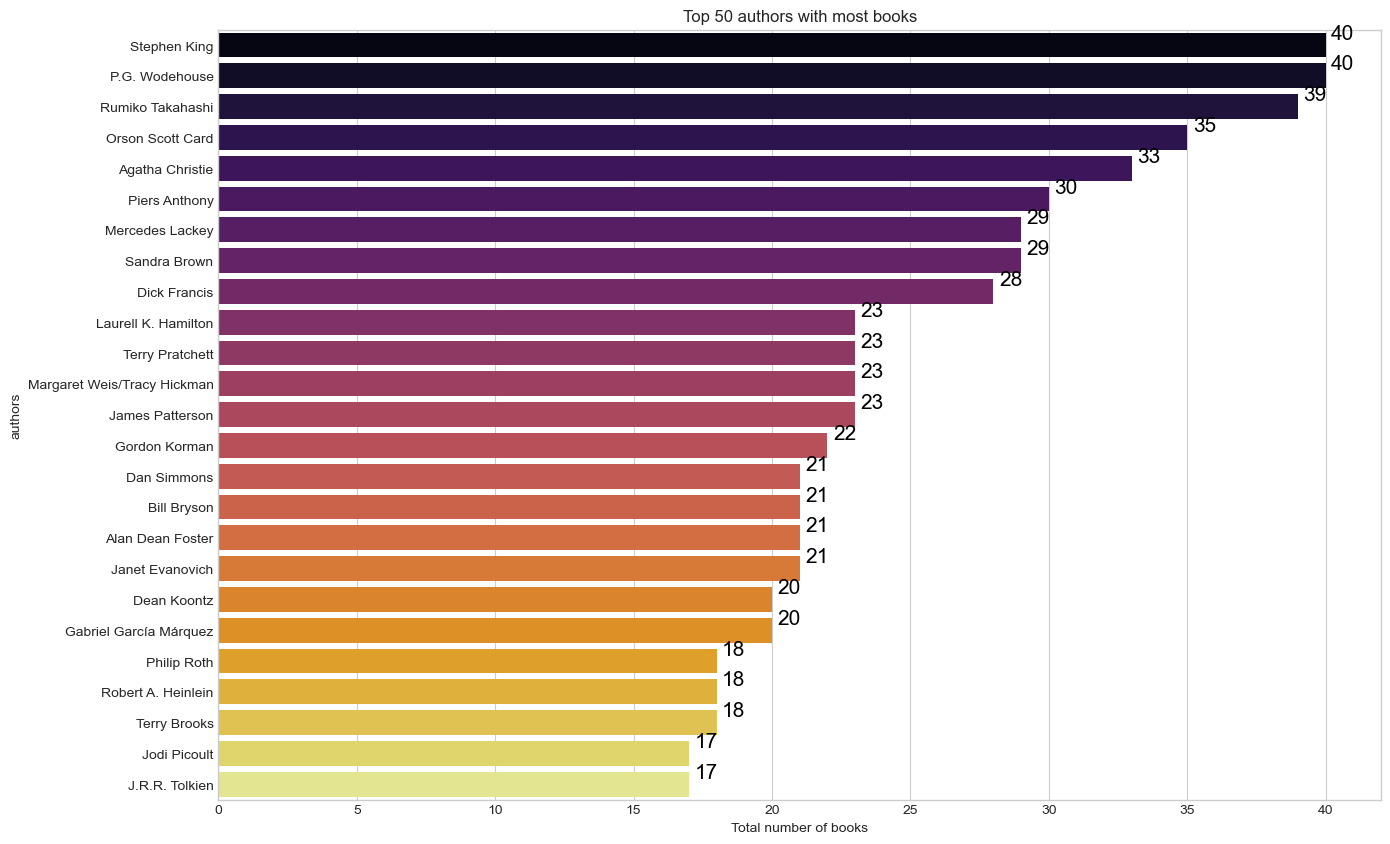

In [7]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(25).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='inferno')
ax.set_title("Top 50 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

Now, we’ll look at the most reviewed books. We have the average rating column in our data and also the number of times a particular book has been rated.

/Users/izegbuaihongbe/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


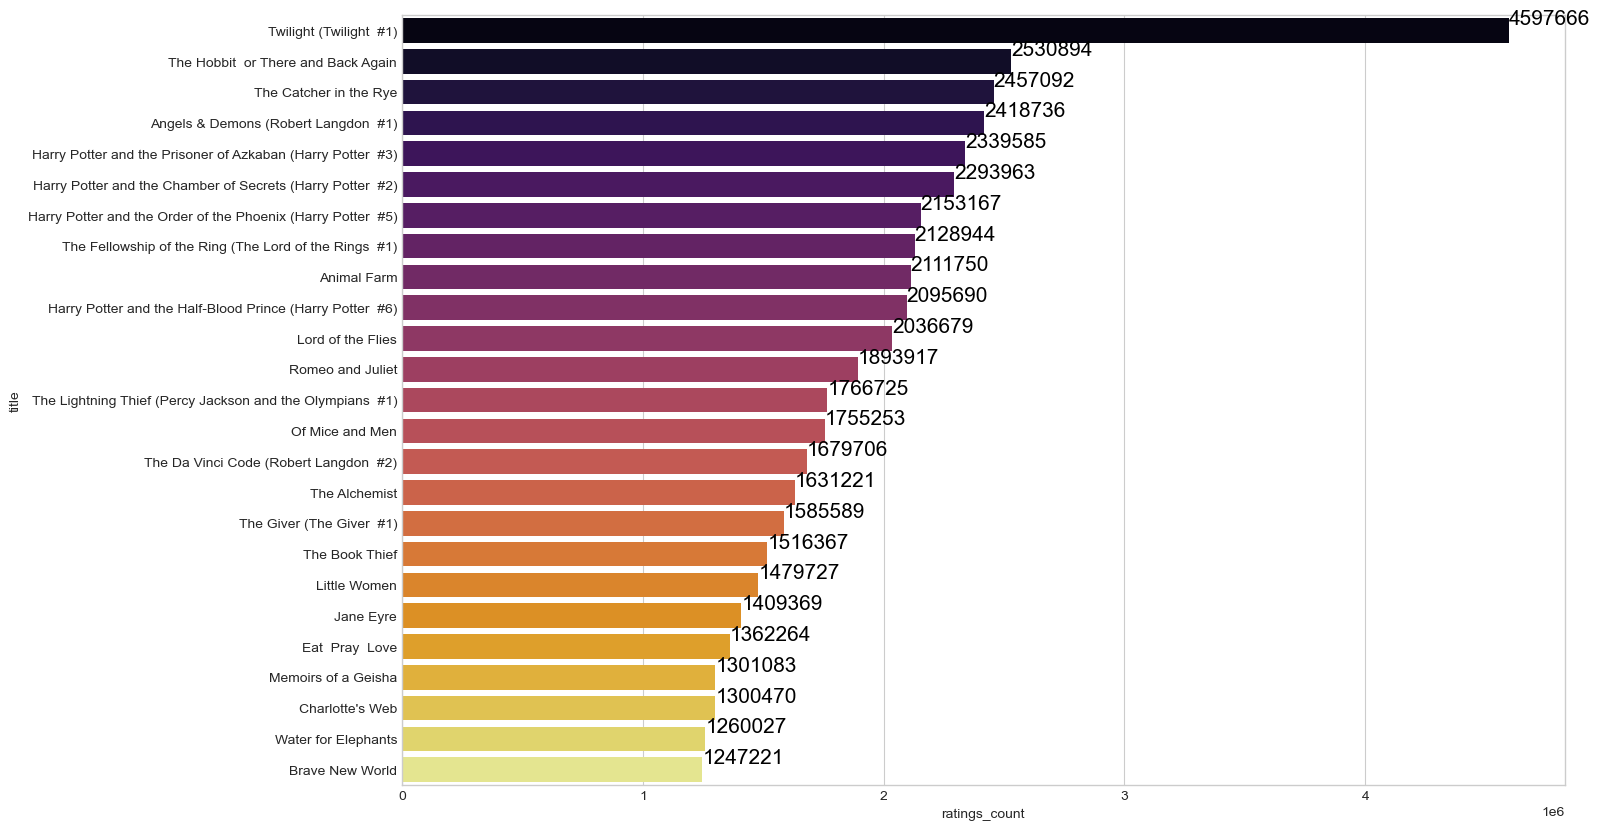

In [8]:
most_rated = df.sort_values('ratings_count', ascending = False).head(25).set_index('title')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_rated['ratings_count'], most_rated.index, palette = 'inferno')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

We can see that Twilight has been rated the most - over 4 million times

Now we'll try to find a relation between our average score and the number of scores to see how we can use these columns in our recommendation.

Text(0.5, 0, 'Average rating')

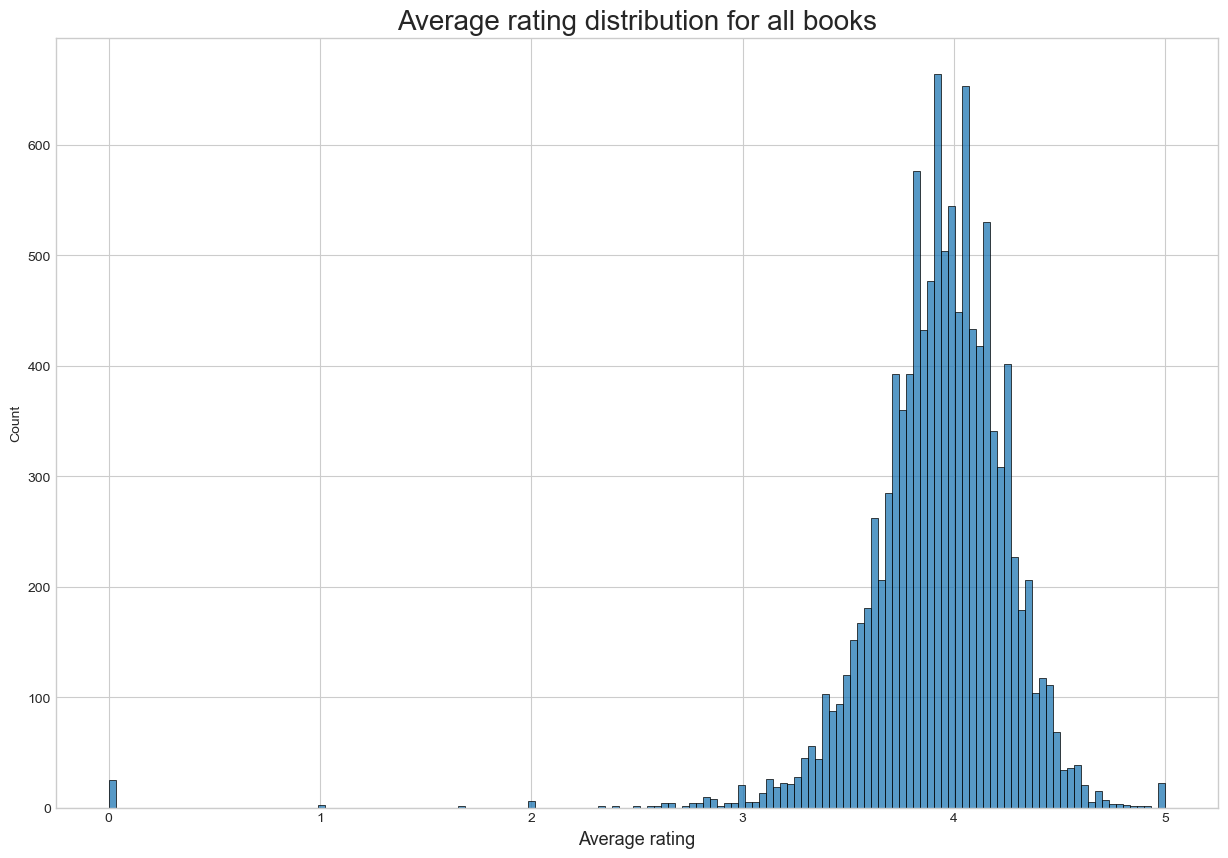

In [9]:
df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.histplot(df['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

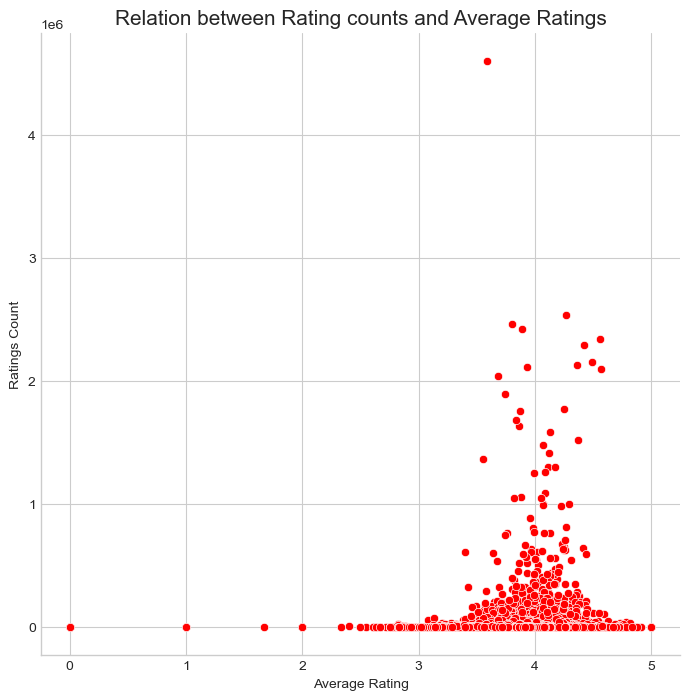

In [10]:
ax = sns.relplot(data=df, x="average_rating", y="ratings_count", color = 'red', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Count")

After comparing the average rating with the different columns, we can continue to use the language and number of ratings for our recommendation system. 

In [11]:
df2 = df.copy() #duplicating the original data to have copy to refer back to

#### Data preparation

Now, we'll create a new value called ‘rating_between’ where we'll categorize our average rating column between 0 and 1, 1 and 2, etc. This will work as one of the features that we will build into our model so that it can make better recommendations

In [12]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

We will now create two new DataFrames containing the different values of the rating_between column that we have just created. Also, 1 will be assigned if the book is written in English and 0 if it is not written in English

In [14]:
rating_df = pd.get_dummies(df2['rating_between'])
language_df = pd.get_dummies(df2['language_code'])

Now we will merge rating_df and language_df into a new data frame called "features" for the Book Recommendation System which includes data from both frames, as well as average grade and number of grades.

In [15]:
features = pd.concat([rating_df, 
                      language_df, 
                      df2['average_rating'], 
                      df2['ratings_count']], axis=1)

### Book Recommendation system

In [16]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [17]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [18]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name
    
BookNames = BookRecommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
BookNames

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)']

In [19]:
#Trying the recommender
BookNames = BookRecommender('The Fellowship of the Ring (The Lord of the Rings  #1)')
BookNames

['The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)']

In [21]:
#Trying the recommender
BookNames = BookRecommender('The Wish List')
BookNames

['The Wish List',
 'Great Expectations',
 'Manhunting',
 'A Bend in the River',
 'Bite (Anita Blake  Vampire Hunter  #8.5; Sookie Stackhouse  #5.1; Undead  #2.5; Mageverse  #1.5)',
 'Under the Net']

In [23]:
#Trying the recommender
BookNames = BookRecommender('Fullmetal Alchemist  Vol. 10')
BookNames

['Fullmetal Alchemist  Vol. 10',
 'Fullmetal Alchemist  Vol. 12 (Fullmetal Alchemist  #12)',
 "The Listener's Bible: NIV",
 'Fullmetal Alchemist  Vol. 14 (Fullmetal Alchemist  #14)',
 'Fullmetal Alchemist  Vol. 11 (Fullmetal Alchemist  #11)',
 'Nausicaä of the Valley of the Wind  Vol. 4 (Nausicaä of the Valley of the Wind  #4)']